<a href="https://colab.research.google.com/github/pinipv/Image_Classifier_DeepLearning/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from skimage import io


from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator


## Recojo las imagenes de los archivos(aprox. 500 de cada categoria)

In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files
import cv2


def obtener_imagenes(etiqueta):
      ### Esta variable contendrá las imagenes de base
      imagenes = []
      imagenes_base = []

      y = []
      uploades = files.upload()  #### Este método permite subir archivos a colab(carpeta content)

      for fn in uploades.keys():
          path = '/content/' + fn
          img = image.load_img(path)

          imagenes_base.append(img)

      for i in range(0,len(imagenes_base)):
                
                #### obtenemos cada ruta de la imagen y la leemos guardando asi la imagen
                ima = np.array(imagenes_base[i])
                
                #### Añadimos cara imagen al array de imagenes base    
                image_resized = cv2.resize(ima, (100,100))  
                imagenes.append(image_resized)  #.astype('float32')/255)    ##Las formatearemos mas adelante

                #### Añadimos cada label de la imagen a la lista de labels(y) definitiva
                y.append(str(etiqueta))
                
      #imagenes = np.array(imagenes)
      #print(np.array(imagenes).shape)
      #print(imagenes[0].shape)
      return (imagenes, y)

### De cada set subido retiro 200 imagenes para usar como test, dejando 300 para hacer DataAugmenting 

In [ ]:
def sacar_test(nparray, labels):
  test = nparray[:199]     
  train = np.delete(nparray,np.s_[:199],0)
  test_labels = labels[:199]
  train_labels = np.delete(labels, np.s_[:199],0)
  return (train, test, train_labels, test_labels)


## Data Augmenting

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range= 40,   ### Maximo valor de rotacion de la imagen
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

In [ ]:
from keras_preprocessing.image.utils import img_to_array
import tensorflow as tf
from tensorflow.keras import layers

def obtener_copias(imagenes_base, etiqueta,copias):
      lista_imagenes = []
      y = []
      generador = train_datagen
      generador.fit(imagenes_base)
      

      for i in imagenes_base:  
              imagen = np.array(i).reshape(-1,100,100,3)  
              it = generador.flow( imagen , batch_size=1)     
              #### Solo se crean las imagenes cuando se hace it.next()
              for j in range(int(copias)):   #### Luego este rango determinará cuantas imágenes se crean
                batch = it.next()
                imag = batch[0]
                imagenn= img_to_array(imag)

                #### Reescalamos la imagen a un formato de (100 x 100)
                IMG_SIZE = 100

                resize_and_rescale = tf.keras.Sequential([
                  layers.Resizing(IMG_SIZE, IMG_SIZE)
                ])

                result = resize_and_rescale(imagenn)

            #### Añadimos la imagen y el label a las listas definitivas
                lista_imagenes.append(result)
                y.append(str(etiqueta))
          
      #### Devolvemos en formato tupla la lista con todas las imagenes y la tupla con todos los labels
      return (lista_imagenes, y)

In [ ]:
from sklearn.preprocessing import LabelEncoder

def categorizar_labels(train_labs, test_labs):
  y_encoded = LabelEncoder().fit_transform(train_labs)
  train_categorical = tf.keras.utils.to_categorical(y_encoded)
  y_encoded = LabelEncoder().transform(test_labs)
  test_categorical = tf.keras.utils.to_categorical(y_encoded)

  return (train_categorical, test_categorical)

In [ ]:
from sklearn.utils import shuffle

def barajar_train(dataset, labels, seed): 

    #### 'Barajamos' los array de imagenes y de labels

    # ¿¿¿¿¿¿¿Necesario???????
    shuffle_dataset = shuffle(dataset, random_state = int(seed))
    shuffle_labels  = shuffle(labels, random_state = int(seed))
    #
    '''
    a,b,c,d = np.vsplit(shuffle_dataset, 4)
    e,f,g,h = np.vsplit(shuffle_labels, 4)
    '''
    train_dataset = shuffle_dataset#np.concatenate((a,b,c), axis=0)
    #test_dataset  = d
    train_labels  = shuffle_labels#np.concatenate((e,f,g), axis= 0)
    #test_labels   = h

    return (train_dataset, train_labels)

# Preprocesado

## Obtencion de imagenes

In [ ]:
airplanes, y_aviones = obtener_imagenes('airplane')
airplanes = np.array(airplanes)

In [ ]:
car, y_car = obtener_imagenes('car')
car = np.array(car)

In [ ]:
cat, y_cat = obtener_imagenes('cat')
cat = np.array(cat)

In [ ]:
dog, y_dog = obtener_imagenes('dog')
dog = np.array(dog)

In [ ]:
flower, y_flower = obtener_imagenes('flower')
flower = np.array(flower)

In [ ]:
fruit, y_fruit = obtener_imagenes('fruit')
fruit = np.array(fruit)

## Separar test de cada una

In [ ]:
train_air, test_air, train_labels_air, test_labels_air = sacar_test(airplanes,y_aviones)

In [ ]:
train_car, test_car, train_labels_car, test_labels_car = sacar_test(car,y_car)

In [ ]:
train_cat, test_cat, train_labels_cat, test_labels_cat = sacar_test(cat,y_cat)

In [ ]:
train_dog, test_dog, train_labels_dog, test_labels_dog = sacar_test(dog,y_dog)

In [ ]:
train_flower, test_flower, train_labels_flower, test_labels_flower = sacar_test(flower,y_flower)

In [ ]:
train_fruit, test_fruit, train_labels_fruit, test_labels_fruit = sacar_test(fruit,y_fruit)

## Obtenemos las copias de cada una con Data Augmenting

In [ ]:
generacion_aviones, y_generacion_aviones = obtener_copias(train_air , 'airplane',3)

In [ ]:
generacion_cars, y_generacion_cars = obtener_copias(train_car , 'car',3)

In [ ]:
generacion_cat, y_generacion_cat = obtener_copias(train_cat , 'cat',3)

In [ ]:
generacion_dog, y_generacion_dog = obtener_copias(train_dog , 'dog',3)

In [ ]:
generacion_flower, y_generacion_flower = obtener_copias(train_flower , 'flower',3)

In [ ]:
generacion_fruit, y_generacion_fruit = obtener_copias(train_fruit , 'fruit',3)

## Unimos los datos finales para train

In [ ]:
train_airplanef = np.concatenate((train_air, np.array(generacion_aviones)), axis=0)
labels_airplanes = np.concatenate((train_labels_air, y_generacion_aviones), axis = 0)

train_lbairplane = labels_airplanes.reshape(-1,1)

In [ ]:
train_carf = np.concatenate((train_car, np.array(generacion_cars)), axis=0)
labels_cars = np.concatenate((train_labels_car, y_generacion_cars), axis = 0)

train_lbcar = labels_cars.reshape(-1,1)

In [ ]:
train_catf = np.concatenate((train_cat, np.array(generacion_cat)), axis=0)
labels_cats = np.concatenate((train_labels_cat, y_generacion_cat), axis = 0)

train_lbcat = labels_cats.reshape(-1,1)

In [ ]:
train_dogf = np.concatenate((train_dog, np.array(generacion_dog)), axis=0)
labels_dogs = np.concatenate((train_labels_dog, y_generacion_dog), axis = 0)

train_lbdog = labels_dogs.reshape(-1,1)

In [ ]:
train_flowerf = np.concatenate((train_flower, np.array(generacion_flower)), axis=0)
labels_flowers = np.concatenate((train_labels_flower, y_generacion_flower), axis = 0)

train_lbflower = labels_flowers.reshape(-1,1)

In [ ]:
train_fruitf = np.concatenate((train_fruit, np.array(generacion_fruit)), axis=0)
labels_fruits = np.concatenate((train_labels_fruit, y_generacion_fruit), axis = 0)

train_lbfruit = labels_fruits.reshape(-1,1)

### train , test, train_labels, test_labels

## Concatenamos todos los train  los test y sus labels y los shuffleamos

In [ ]:
train =  np.concatenate((train_airplanef, train_carf, train_catf, train_dogf, train_flowerf, train_fruitf), axis=0)
train_labels = np.concatenate((train_lbairplane, train_lbcar, train_lbcat, train_lbdog, train_lbflower, train_lbfruit))

X_train, y_train = barajar_train(train, train_labels, 42)

In [ ]:
test = np.concatenate((test_air, test_car, test_car, test_dog, test_flower, test_fruit))
test_labels = np.concatenate((test_labels_air, test_labels_car, test_labels_cat, test_labels_dog, test_labels_flower, test_labels_fruit), axis =0)

X_test, y_test = barajar_train(test, test_labels, 42)

## En este punto tenemos las imagenes para train, para test(todo ya separado), y sus respectivos labels(sin categorizar)

In [ ]:
from sklearn.preprocessing import LabelEncoder

def categorizar_labels(train_labs, test_labs):
  y_encoded = LabelEncoder().fit_transform(train_labs)
  train_categorical = tf.keras.utils.to_categorical(y_encoded)
  y_encoded = LabelEncoder().fit_transform(test_labs)
  test_categorical = tf.keras.utils.to_categorical(y_encoded)

  return (train_categorical, test_categorical)

In [ ]:
y_train, y_test = categorizar_labels(y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7224, 100, 100, 3)
(7224, 6)
(1194, 100, 100, 3)
(1194, 6)


## En este punto ya tendriamos todo listo para entrenar el modelo

# Modelo

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (100,100,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))



# Cambio aqui #
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(6, activation = "softmax"))

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              # Cambio aqui #
              optimizer = adam , #'adam',
              metrics = ['accuracy', tf.keras.metrics.OneHotIoU(num_classes=6, target_class_ids=[1]), tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

eS = EarlyStopping(monitor = 'loss',
                   mode='min',
                   patience = 5,
                   verbose = 1,
                   restore_best_weights = True)

In [ ]:
history = model.fit(X_train,y_train, validation_split = 0.2, verbose=1, epochs = 30, callbacks=[eS])

Epoch 1/30
181/181 [==============================] - 536s 3s/step - loss: 1.6116 - accuracy: 0.3231 - one_hot_io_u_1: 0.2961 - categorical_accuracy: 0.3231 - val_loss: 1.3944 - val_accuracy: 0.4388 - val_one_hot_io_u_1: 0.4030 - val_categorical_accuracy: 0.4388
Epoch 2/30
181/181 [==============================] - 534s 3s/step - loss: 1.2869 - accuracy: 0.4888 - one_hot_io_u_1: 0.4204 - categorical_accuracy: 0.4888 - val_loss: 1.1399 - val_accuracy: 0.5356 - val_one_hot_io_u_1: 0.4772 - val_categorical_accuracy: 0.5356
Epoch 3/30
181/181 [==============================] - 533s 3s/step - loss: 1.0099 - accuracy: 0.6001 - one_hot_io_u_1: 0.5165 - categorical_accuracy: 0.6001 - val_loss: 1.0429 - val_accuracy: 0.5799 - val_one_hot_io_u_1: 0.5163 - val_categorical_accuracy: 0.5799
Epoch 4/30
181/181 [==============================] - 534s 3s/step - loss: 0.8984 - accuracy: 0.6510 - one_hot_io_u_1: 0.5936 - categorical_accuracy: 0.6510 - val_loss: 0.8519 - val_accuracy: 0.6574 - val_one_ho

In [ ]:
history_dict = history.history
acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

<Figure size 432x288 with 0 Axes>

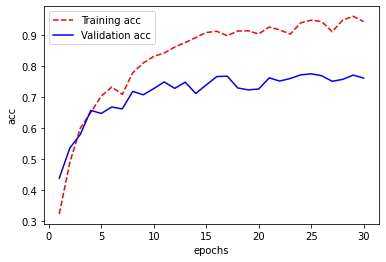

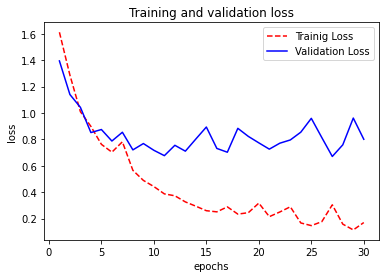

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(1, len(acc)+1, 1)

plt.plot  (epochs, acc    , 'r--', label = 'Training acc')
plt.plot  (epochs, val_acc, 'b'  , label = 'Validation acc')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()
plt.plot (epochs, loss    , 'r--', label = 'Trainig Loss')
plt.plot (epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [ ]:
test_loss= model.evaluate(X_test, y_test)
#print('Test Accuracy:',test_acc)

38/38 [==============================] - 25s 638ms/step - loss: 2.3157 - accuracy: 0.6466 - one_hot_io_u_1: 0.4249 - categorical_accuracy: 0.6466


In [ ]:
test_loss

[2.315715789794922,
 0.6465661525726318,
 0.42487046122550964,
 0.6465661525726318]

In [ ]:
model.save('content/modelo.h5')